<a href="https://colab.research.google.com/github/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/blob/main/Spaceship_Titanic_Challenge_Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
#Load data from GitHub

train_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/train.csv'
test_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/test.csv'

train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

In [61]:
#Print first few rows

train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**EDA**

In [62]:
#Overview of dataset

print("Dataset info")
train.info()

print("\n Descriptiv statistics")
display(train.describe(include = 'all'))

print("\n Missing valuse")
missing_values = train.isnull().sum()
print(missing_values)

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

 Descriptiv statistics


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN



 Missing valuse
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


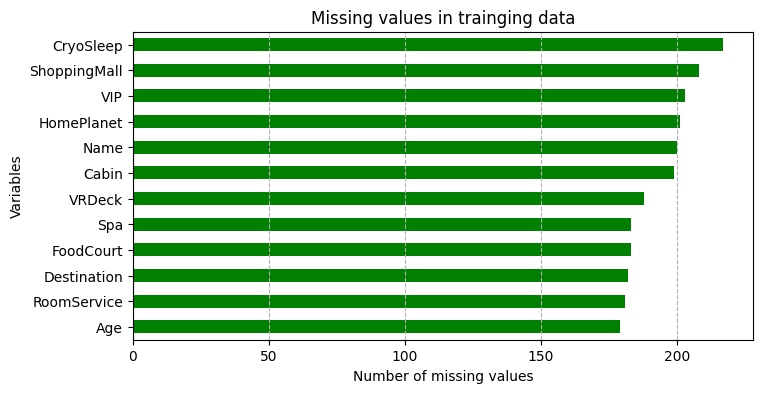

In [63]:
#Visualize the missing values

missing_values = missing_values[missing_values > 0].sort_values(ascending = True)

plt.figure(figsize=(8, 4))
missing_values.plot(kind = 'barh', color ='green')
plt.title("Missing values in trainging data")
plt.xlabel("Number of missing values")
plt.ylabel("Variables")
plt.grid(axis = 'x', linestyle = '--')
plt.show()


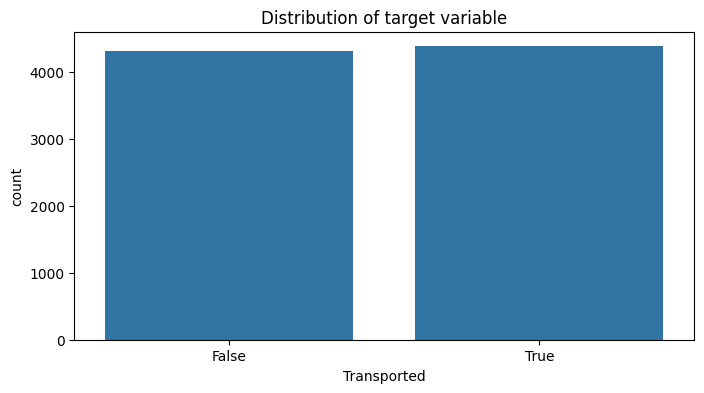

In [64]:
#Target variable distribution

plt.figure(figsize=(8, 4))
sns.countplot(x='Transported', data=train)
plt.title("Distribution of target variable")
plt.show()

/tmp/ipython-input-65-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


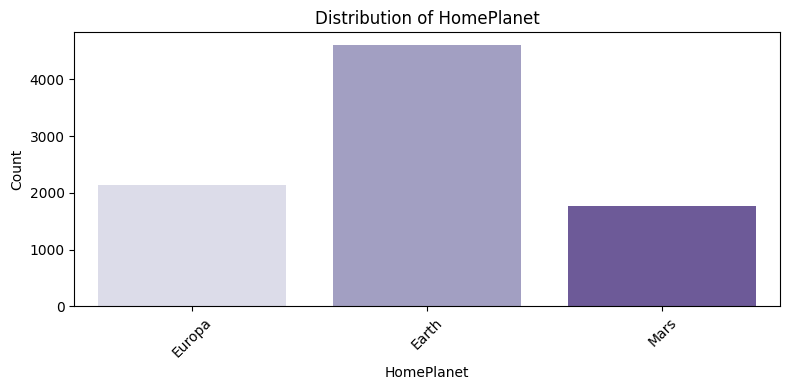

/tmp/ipython-input-65-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


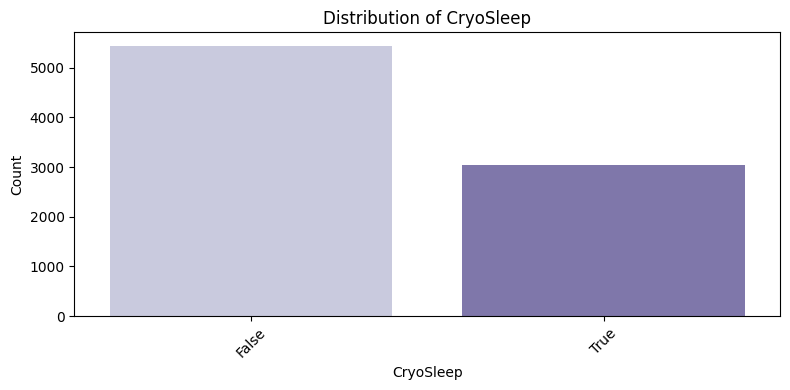

/tmp/ipython-input-65-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


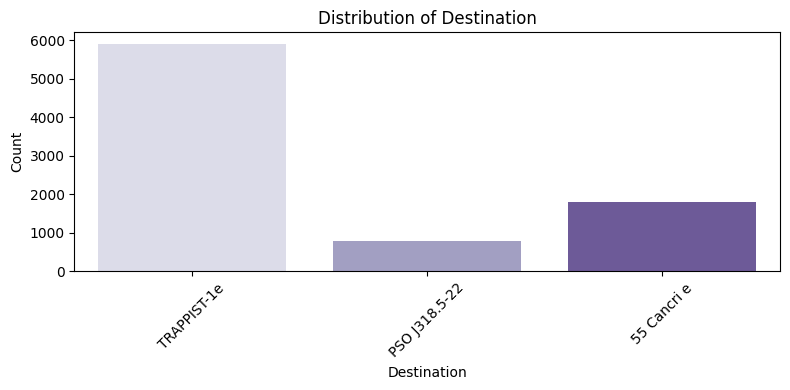

/tmp/ipython-input-65-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


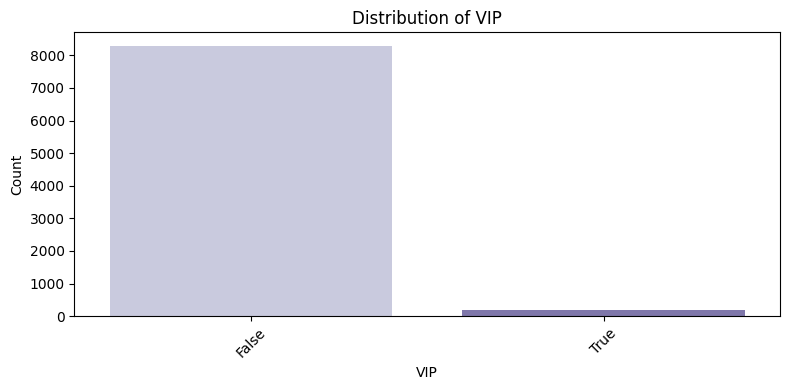

In [65]:
#Distribution of categorical variables "HomePlanet, CryoSleep, Destination, VIP'"

categorical_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for variable in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=train, palette='Purples')
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

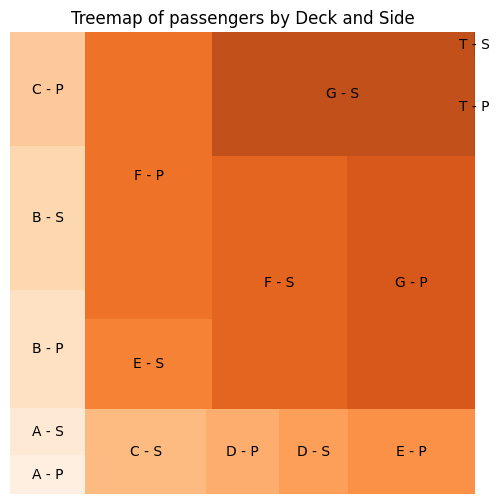

In [66]:
#Split the cabin column
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)

#Group data by deck and dide
deck_side_counts = train.groupby(['Deck', 'Side']).size().reset_index(name='Count')

#Create a labels
deck_side_counts['Label'] = deck_side_counts['Deck'] + ' - ' + deck_side_counts['Side']

#Plot the Treemap
plt.figure(figsize=(6, 6))
squarify.plot(
    sizes=deck_side_counts['Count'],
    label=deck_side_counts['Label'],
    color=sns.color_palette('Oranges', len(deck_side_counts)),
    alpha=0.9
)
plt.title("Treemap of passengers by Deck and Side", fontsize=12)
plt.axis('off')
plt.show()

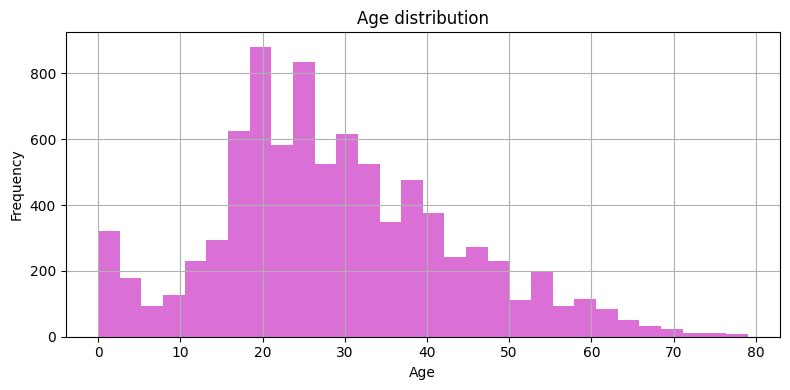

In [67]:
#Distribution of categorical variables

num_col = ['Age']
ax = train[num_col].hist(bins=30, figsize=(8,4), color='orchid')[0][0]
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Age distribution")
plt.tight_layout()
plt.show()

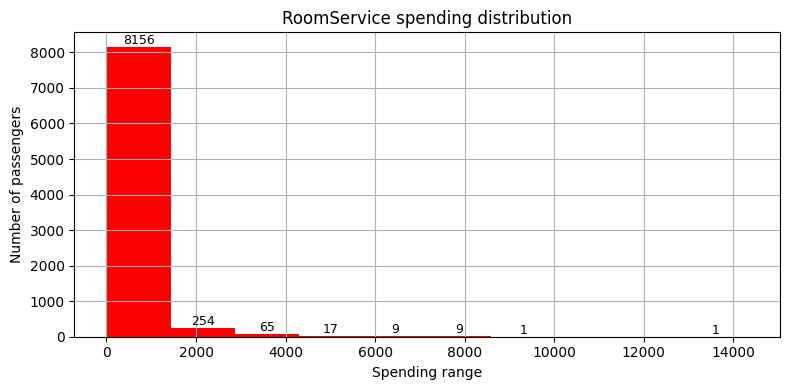

In [68]:
num_col = ['RoomService']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='red')[0][0]

ax.set_xlabel("Spending range")
ax.set_ylabel("Number of passengers")
ax.set_title("RoomService spending distribution")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

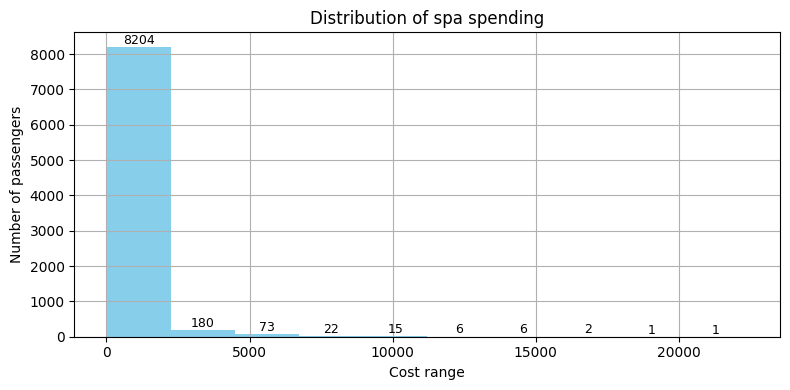

In [69]:
num_col = ['Spa']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='skyblue')[0][0]

ax.set_xlabel("Cost range")
ax.set_ylabel("Number of passengers")
ax.set_title("Distribution of spa spending")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

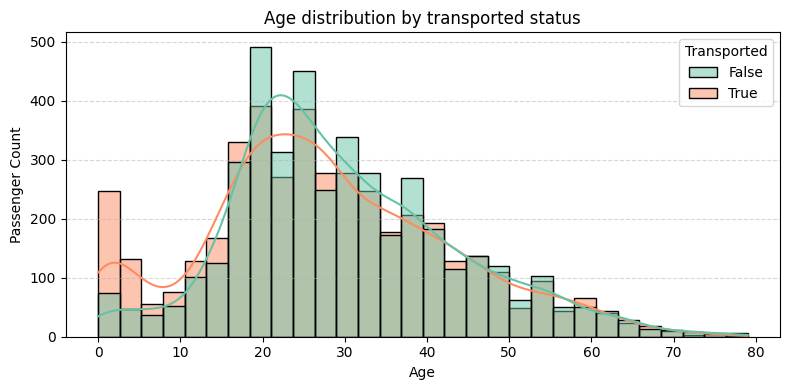

In [70]:
#Age distribution vs transport

plt.figure(figsize=(8, 4))
sns.histplot(data=train, x='Age', hue='Transported', bins=30, kde=True, palette='Set2')
plt.title("Age distribution by transported status")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-71-2115318661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HomePlanet', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='viridis')
/tmp/ipython-input-71-2115318661.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Side', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='plasma')


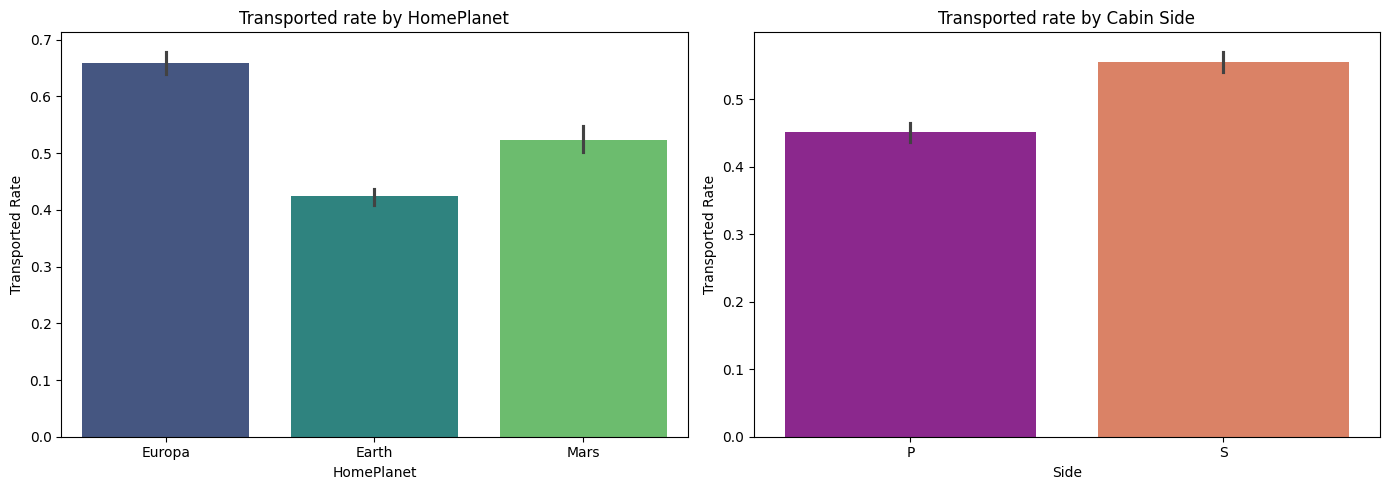

In [71]:
#Transported Rate by HomePlanet/Cabin Side

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='HomePlanet', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.title("Transported rate by HomePlanet")
plt.ylabel("Transported Rate")

plt.subplot(1, 2, 2)
sns.barplot(x='Side', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='plasma')
plt.title("Transported rate by Cabin Side")
plt.ylabel("Transported Rate")

plt.tight_layout()
plt.show()

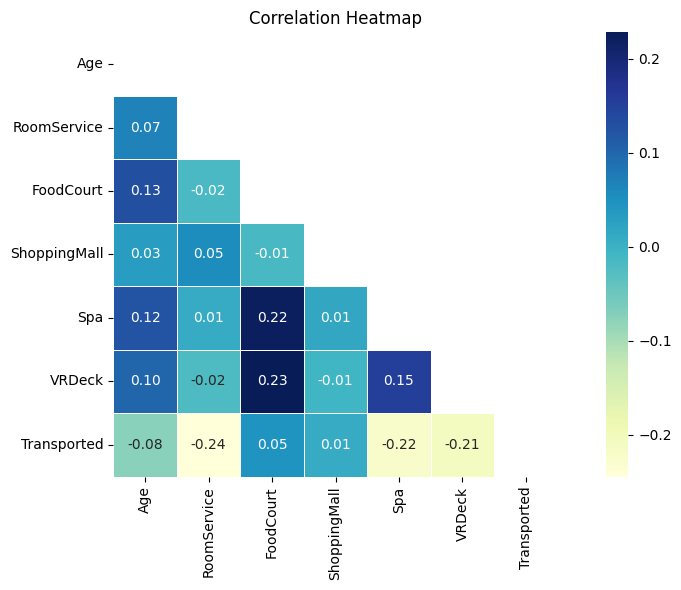

In [72]:
train_corr = train.copy()
train_corr['Transported'] = train_corr['Transported'].astype(int)

plt.figure(figsize=(10, 6))
corr_matrix = train_corr[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Pre Processing**

In [73]:
#Fill numerical with mean

numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numerical_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = train[col].fillna(train[col].mean())

In [74]:
#Fill 'Name' with 'Unknown'

train['Name'] = train['Name'].fillna('Unknown')
test['Name'] = test['Name'].fillna('Unknown')

In [75]:
#Fill categorical missing value with mode

#Variables 'HomePlanet', 'Destination', 'VIP', 'CryoSleep'

cat_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])

/tmp/ipython-input-75-4183409037.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(train[col].mode()[0])
/tmp/ipython-input-75-4183409037.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(train[col].mode()[0])


In [76]:
#Variable 'Cabin'

#Split the into Deck/Num/Side
train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train['Cabin'].str.split('/', expand=True)
test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test['Cabin'].str.split('/', expand=True)

#Filling the missing deck and side with mode
train['Cabin_Deck'] = train['Cabin_Deck'].fillna(train['Cabin_Deck'].mode()[0])
test['Cabin_Deck'] = test['Cabin_Deck'].fillna(train['Cabin_Deck'].mode()[0])

train['Cabin_Side'] = train['Cabin_Side'].fillna(train['Cabin_Side'].mode()[0])
test['Cabin_Side'] = test['Cabin_Side'].fillna(train['Cabin_Side'].mode()[0])

print(train[['Cabin', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']].head())

#Cabin_Num is numeric
train['Cabin_Num'] = pd.to_numeric(train['Cabin_Num'], errors='coerce')
test['Cabin_Num'] = pd.to_numeric(test['Cabin_Num'], errors='coerce')

train['Cabin_Num'] = train['Cabin_Num'].fillna(train['Cabin_Num'].mean())
test['Cabin_Num'] = test['Cabin_Num'].fillna(train['Cabin_Num'].mean())


   Cabin Cabin_Deck Cabin_Num Cabin_Side
0  B/0/P          B         0          P
1  F/0/S          F         0          S
2  A/0/S          A         0          S
3  A/0/S          A         0          S
4  F/1/S          F         1          S


In [77]:
#Recombined split variables to Cabin

#Make data types string
train['Cabin_Deck'] = train['Cabin_Deck'].astype(str)
train['Cabin_Num'] = train['Cabin_Num'].astype(int).astype(str)
train['Cabin_Side'] = train['Cabin_Side'].astype(str)

test['Cabin_Deck'] = test['Cabin_Deck'].astype(str)
test['Cabin_Num'] = test['Cabin_Num'].astype(int).astype(str)
test['Cabin_Side'] = test['Cabin_Side'].astype(str)

#Recombine to new Cabin column
train['N_Cabin'] = train['Cabin_Deck'] + '/' + train['Cabin_Num'] + '/' + train['Cabin_Side']
test['N_Cabin'] = test['Cabin_Deck'] + '/' + test['Cabin_Num'] + '/' + test['Cabin_Side']

print(train[['N_Cabin']].head())

#Drop old split columns from train and test if exist

for df in [train, test]:
    for col in ['Deck', 'CabinNum', 'Side']:
        if col in df.columns:
            df.drop(columns=col, inplace=True)


  N_Cabin
0   B/0/P
1   F/0/S
2   A/0/S
3   A/0/S
4   F/1/S


/tmp/ipython-input-78-1258496534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Cabin_Deck', palette='Purples')
/tmp/ipython-input-78-1258496534.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Cabin_Side', palette='Purples')


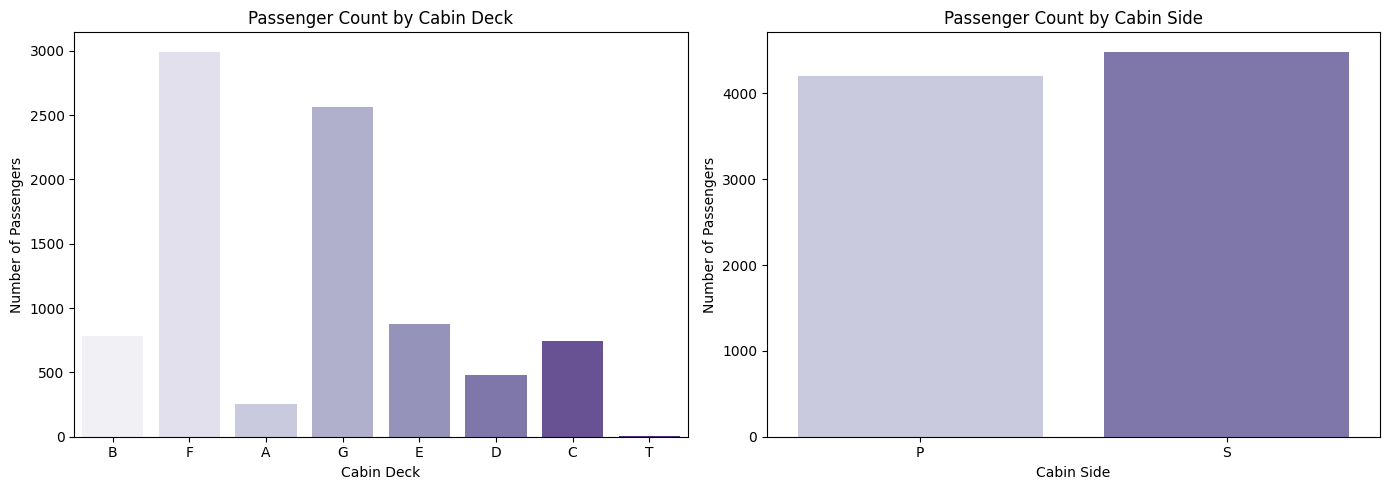

In [78]:
###################### remove if unwanted
plt.figure(figsize=(14,5))

#Cabin_Deck count
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Cabin_Deck', palette='Purples')
plt.title('Passenger Count by Cabin Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('Number of Passengers')

#Cabin_Side count
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Cabin_Side', palette='Purples')
plt.title('Passenger Count by Cabin Side')
plt.xlabel('Cabin Side')
plt.ylabel('Number of Passengers')

plt.tight_layout()
plt.show()

In [79]:
#Age
#Filled with median since age may skewed

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

In [80]:
print("\n Missing values - Train \n")
print(train.isnull().sum())

print("\n Missing values - Test \n")
print(test.isnull().sum())


 Missing values - Train 

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Cabin_Deck        0
Cabin_Num         0
Cabin_Side        0
N_Cabin           0
dtype: int64

 Missing values - Test 

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Cabin_Deck        0
Cabin_Num         0
Cabin_Side        0
N_Cabin           0
dtype: int64


In [81]:
#Encoding categorical variables

cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                    'Cabin_Deck', 'Cabin_Side']

#Convert categories into numbers using LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

    #Print mapping of codes to original categories
    print(f"Mapping for {col}:")
    for code, category in enumerate(encoder.classes_):
        print(f"  {code} --> {category}")
    print()

#Check first few rows
print("\n Encoded data")
print(train[cat_cols].head())

Mapping for HomePlanet:
  0 --> Earth
  1 --> Europa
  2 --> Mars

Mapping for CryoSleep:
  0 --> False
  1 --> True

Mapping for Destination:
  0 --> 55 Cancri e
  1 --> PSO J318.5-22
  2 --> TRAPPIST-1e

Mapping for VIP:
  0 --> False
  1 --> True

Mapping for Cabin_Deck:
  0 --> A
  1 --> B
  2 --> C
  3 --> D
  4 --> E
  5 --> F
  6 --> G
  7 --> T

Mapping for Cabin_Side:
  0 --> P
  1 --> S


 Encoded data
   HomePlanet  CryoSleep  Destination  VIP  Cabin_Deck  Cabin_Side
0           1          0            2    0           1           0
1           0          0            2    0           5           1
2           1          0            2    1           0           1
3           1          0            2    0           0           1
4           0          0            2    0           5           1


In [82]:
#Select target variable and features

target = 'Transported'

#Variables use to predict the target variable
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']

#Seperate X and y for traiing
X = train[features]
y = train[target].astype(int)

#Select features for test set
X_test = test[features]

#Print training data set shape
print("Shape of training features (X):", X.shape)
print("Shape of target variable (y): \n", y.shape)

#Print first 5 rows of to check data
print("\n First 5 rows of X:")
print(X.head())

#Print distribution of target variable
print("\nTarget variable distribution:")
print(y.value_counts())

Shape of training features (X): (8693, 13)
Shape of target variable (y): 
 (8693,)

 First 5 rows of X:
   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        109.0        9.0   
2           1          0            2  58.0    1         43.0     3576.0   
3           1          0            2  33.0    0          0.0     1283.0   
4           0          0            2  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Cabin_Deck Cabin_Num  Cabin_Side  
0           0.0     0.0     0.0           1         0           0  
1          25.0   549.0    44.0           5         0           1  
2           0.0  6715.0    49.0           0         0           1  
3         371.0  3329.0   193.0           0         0           1  
4         151.0   565.0     2.0           5         1           1  

Target variable distribution:
